# Analysis of the sound produced by underwater bubbles

<img src="https://biox.stanford.edu/sites/g/files/sbiybj7941/f/ocean_bubbles_banner.png" alt="drawing" width="1000"/>

In [10]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io import wavfile
from io import BytesIO
from ipywidgets import Audio

plt.rcParams["figure.dpi"] = 120
plt.rcParams['pcolor.shading'] = "auto"

In [11]:
fname = "underwater-bubbles.wav"
#fname = "whales-dophin-sample.wav"
url = f"https://github.com/dspelaez/underwater-acoustics/blob/master/sample_sounds/{fname}?raw=true"
#url = "https://spiddal.marine.ie/data/audio/ICListenRecordings/2021/10/25/icListen_1622_20211025T001755Z.wav"

In [12]:
w = Audio.from_url(url, autoplay=False, loop=False)
w

Audio(value=b'https://github.com/dspelaez/underwater-acoustics/blob/master/sample_sounds/underwater-bubbles.wa…

In [13]:
class SoundFile(object):
    """Handle wav files"""

    def __init__(self, fname):
        """Class constructor"""
        self.fname = fname
        self._read()
    
    @classmethod
    def from_url(cls, fname):
        r = requests.get(fname)
        return cls(BytesIO(r.content))
    
    def _read(self):
        """Read sound wave file"""
        self.sampling_rate, self.data = wavfile.read(self.fname)
        if self.data.ndim > 1:
            self.data = self.data[:,0]

In [14]:
sf = SoundFile.from_url(url)
target_time = 10.67

In [15]:
def plot_spectrogram(self, vmin=-4, vmax=4, cmap="magma", nperseg=1024, ref=1E-6):
    """Plot spectrogram"""

    if hasattr(self, "data"):
        # calculate spectrogram
        self.frqs, self.time, self.power = signal.spectrogram(
            self.data, fs=self.sampling_rate, nperseg=nperseg, noverlap=nperseg/10
        )
        self.mels = 2595 * np.log10(1 + self.frqs / 500)
        self.decibels = 10 * np.ma.log10(self.power / ref)
        self.decibels = self.decibels.filled(-60)

        # plot figure
        fig, (ax1, ax2) = plt.subplots(
            2, 1, figsize=(7,4), gridspec_kw={"height_ratios": [1,3]}, sharex=True
        )
        self._t = np.linspace(0, len(self.data), len(self.data)) / self.sampling_rate
        ax1.plot(self._t, self.data)
        pc = ax2.pcolormesh(
            self.time, self.frqs[1:], self.decibels[1:,:], #skip zero
            vmin=vmin, vmax=vmax, cmap=cmap, shading="auto"
        )
        vmax = np.max(np.abs(self.data))
        ax1.set_ylim((-vmax, vmax))
        ax2.set_ylabel("Frequency [Hz]")
        #
        cax = ax2.inset_axes([1,0,0.025,1])
        cb = fig.colorbar(pc, cax=cax, label=f"dB re {np.int64(10*np.log10(ref)):d}")

        return fig, ax1, ax2, cb

    else:
        print("No data available")


In [16]:
def natural_frequency(a, gamma=1.4, p0=1):
    """Return natural bubble frequency"""
    return np.sqrt(3 * gamma * p0 / a**2)

def shape_frequency(a, n, T=72/1000):
    """Returns the bubble shape frequency"""
    return np.sqrt((n-1)*(n+1)*(n+2)*(T/a**2))

AttributeError: 'SoundFile' object has no attribute 'frqs'

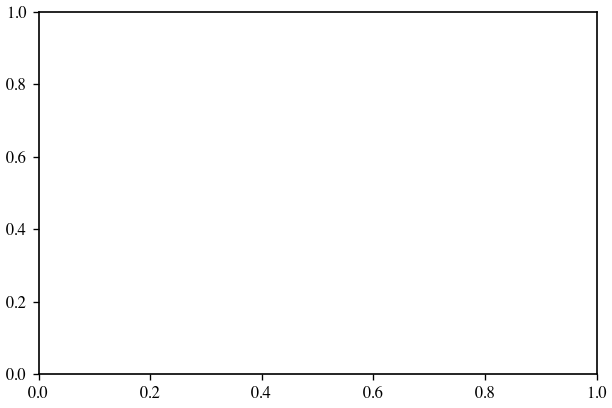

In [18]:
fig, ax = plt.subplots(1)
#ix = np.argmin(np.abs(sf.time - target_time))
ax.semilogx(sf.frqs, sf.decibels.mean(axis=1))
ax.set(xlabel="Frequency [Hz]", ylabel="dB")

ax.axvline(natural_frequency(a=0.001, gamma=1.5, p0=1), color="k")
fstar = [47.4, 16.8, 7.94, 7.92, 4.31, 2.60, 1.69]
for f in fstar:
    ax.axvline(f*1000)


In [ ]:
sf.power.max()